# Time Series Analysis

In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy  as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://github.com/zxhdaze/pharmacysale/blob/main/yahoo_stock.csv?raw=true',index_col = 'Date', parse_dates=True)
# Print the contents of the DataFrame
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [3]:
yahoo = data.loc[:,["Close"]].copy()

# Print the first few rows of the new DataFrame
yahoo.head()

,Close
Date,
2015-11-23,2086.590088
2015-11-24,2089.139893
2015-11-25,2088.870117
2015-11-26,2088.870117
2015-11-27,2090.110107


In [ ]:
hist = yahoo.hist()

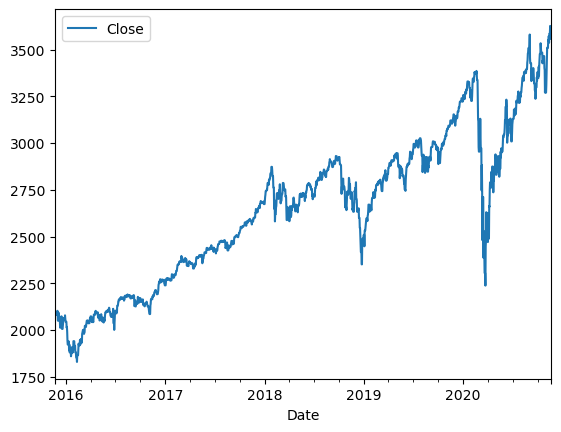

In [4]:
# plot
fig, ax = plt.subplots()
yahoo.plot(ax=ax)
plt.show()

In [5]:
##Do the ADF test
result = adfuller(yahoo['Close'])
print("ADF Statistic: {:.4f}".format(result[0]))
print("p-value: {:.4f}".format(result[1]))
print("Critical Values:")
for key, value in result[4].items():
    print("\t{}: {:.4f}".format(key, value))

ADF Statistic: -0.8704
p-value: 0.7976
Critical Values:
	1%: -3.4340
	5%: -2.8631
	10%: -2.5676


In [6]:
##take the difference of the data
yahoo_diff = yahoo.diff().dropna()

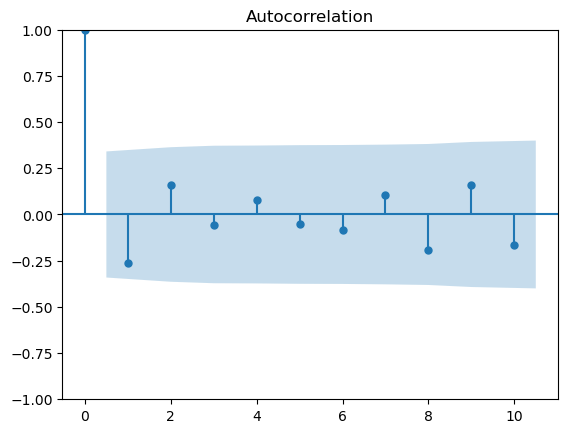

In [7]:
##plot the ACF
yahoo_acf = acf(yahoo_diff)
acf_plot = plot_acf(yahoo_acf, lags=10)

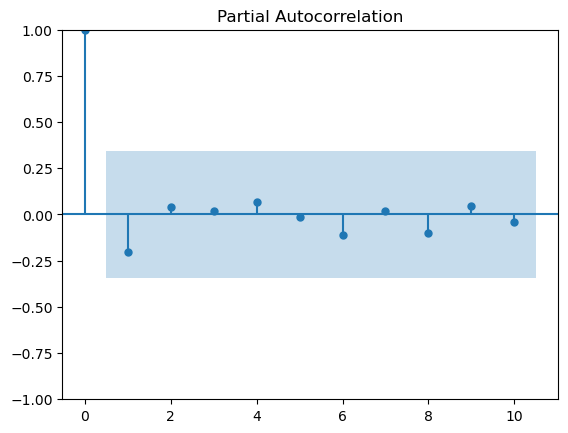

In [8]:
yahoo_pacf = pacf(yahoo_diff)
pacf_plot = plot_pacf(yahoo_pacf, lags = 10)